# Banknote Fraud Detection with SVM

### Imports

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

### Read Data

In [2]:
df = pd.read_csv('banknote_authentication.csv')

df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Take useful features

In [3]:
features = ['Variance', 'Skewness', 'Kurtosis', 'Entropy']
df_x = df[features]
df_y = df['Class']

### Train/Test Split

In [4]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

### Scale features

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

### Model Training

In [6]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1.0, gamma='scale')
model.fit(train_x, train_y)

SVC(kernel='linear')

### Accuracy evaluation



In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

test_y_predictions = model.predict(test_x)

print(f"Accuracy: {accuracy_score(test_y, test_y_predictions):.2f}")

Accuracy: 0.99


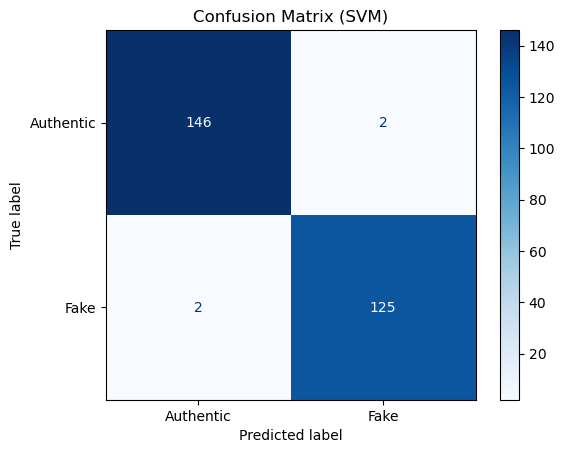

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(test_y, test_y_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['Authentic', 'Fake'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (SVM)')
plt.show()